In [5]:
import numpy as np
import pandas as pd
import keras as ks

import os
from datetime import datetime
import json


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image as ks_preprocessing_image
import seaborn as sns

In [6]:
# All paths to data
root_data_dir = r"/media/batman/Windows/Data TEMP/cats_dogs_small"
path_train =root_data_dir + r"/train"
path_test = root_data_dir + r"/test"
path_validation = root_data_dir + r"/validation"

path_test_cats = root_data_dir + "/test/cats"
path_test_dogs = root_data_dir + "/test/dogs"

path_train_cats = root_data_dir + "/train/cats"
path_train_cats = root_data_dir + "/train/dogs"

path_validation_cats = root_data_dir + "/validation/cats"
path_talidation_cats = root_data_dir + "/validation/dogs"

In [7]:
# Inspect the data
import os
 
# Set the directory you want to start from
rootDir = root_data_dir
print("{:<80} {:<20}".format( 'Directory', 'Number files'))
for dirName, subdirList, fileList in os.walk(rootDir):
    print("{:<80} {:<20}".format( dirName, len(fileList)))
    

Directory                                                                        Number files        
/media/batman/Windows/Data TEMP/cats_dogs_small                                  0                   
/media/batman/Windows/Data TEMP/cats_dogs_small/test                             0                   
/media/batman/Windows/Data TEMP/cats_dogs_small/test/cats                        500                 
/media/batman/Windows/Data TEMP/cats_dogs_small/test/dogs                        500                 
/media/batman/Windows/Data TEMP/cats_dogs_small/train                            0                   
/media/batman/Windows/Data TEMP/cats_dogs_small/train/cats                       1000                
/media/batman/Windows/Data TEMP/cats_dogs_small/train/dogs                       1000                
/media/batman/Windows/Data TEMP/cats_dogs_small/validation                       0                   
/media/batman/Windows/Data TEMP/cats_dogs_small/validation/cats                  5

In [14]:
# The network architecture
model = ks.models.Sequential()

model.add(ks.layers.Conv2D(32, (3,3), activation = "relu", input_shape=(224,224,3)))
model.add(ks.layers.MaxPooling2D(2,2))

model.add(ks.layers.Conv2D(64, (3,3), activation = "relu"))
model.add(ks.layers.MaxPooling2D(2,2))

model.add(ks.layers.Conv2D(128, (3,3), activation = "relu"))
model.add(ks.layers.MaxPooling2D(2,2))

model.add(ks.layers.Conv2D(128, (3,3), activation = "relu"))
model.add(ks.layers.MaxPooling2D(2,2))

model.add(ks.layers.Flatten()) # This is just a reshape!

model.add(ks.layers.Dropout(0.5))

model.add(ks.layers.Dense(512,activation="relu"))
model.add(ks.layers.Dense(1,activation="sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)       147584    
__________

In [15]:
# Compile the network (Attached Optimizer, loss, Metrics)
model.compile(   
    optimizer = ks.optimizers.RMSprop(lr=0.0001),
    loss= ks.losses.binary_crossentropy,
    metrics= ["accuracy"],
)

In [16]:
# DATA GENERATORS
# Specify training data generator 1 - pure images
train_datagen1_pure = ks_preprocessing_image.ImageDataGenerator()

# Specify training data generator 2- augmentation
train_datagen2_aug = ks_preprocessing_image.ImageDataGenerator(rescale=1/255,
                                              rotation_range = 40,
                                              width_shift_range = 0.2,
                                              height_shift_range = 0.2,
                                              shear_range = 0.2,
                                              zoom_range= 0.2,
                                              horizontal_flip=True)

# Specify validation data generator - pure images
validation_datagen = ks.preprocessing.image.ImageDataGenerator()

In [17]:
# 
this_train_datagen = train_datagen1_pure
train_generator = this_train_datagen.flow_from_directory(
    path_train,
    target_size = (224,224),
    batch_size = 20,
    class_mode = "binary"
)
print("Training data: {} with {} images".format(train_generator, train_generator.n))

validation_generator = validation_datagen.flow_from_directory(
    path_validation,
    target_size = (224,224),
    batch_size = 20,
    class_mode = "binary"
)
print("Validation data: {} with {} images".format(validation_generator, validation_generator.n))


Found 2000 images belonging to 2 classes.
Training data: <keras.preprocessing.image.DirectoryIterator object at 0x7f06b02c2278> with 2000 images
Found 1000 images belonging to 2 classes.
Validation data: <keras.preprocessing.image.DirectoryIterator object at 0x7f06b02c2f98> with 1000 images


In [18]:
# Train the network
if 1: # Quick training
    history = model.fit_generator(
        train_generator,
        steps_per_epoch = 10,
        epochs=10,
        validation_data = validation_generator,
        validation_steps = 50,
        )

if 0: # Full training
    history = model.fit_generator(
        train_generator,
        steps_per_epoch = 100,
        epochs=30,
        validation_data = validation_generator,
        validation_steps = 50,
        )


Epoch 1/10
10/10 [==============================] - 64s 6s/step - loss: 8.2178 - acc: 0.4700 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/10
10/10 [==============================] - 105s 10s/step - loss: 7.7321 - acc: 0.5150 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 3/10
10/10 [==============================] - 99s 10s/step - loss: 7.8915 - acc: 0.5050 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 4/10
10/10 [==============================] - 76s 8s/step - loss: 7.7321 - acc: 0.5150 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 5/10
10/10 [==============================] - 144s 14s/step - loss: 8.2900 - acc: 0.4800 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 6/10
10/10 [==============================] - 83s 8s/step - loss: 8.0509 - acc: 0.4950 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 7/10
10/10 [==============================] - 119s 12s/step - loss: 7.4929 - acc: 0.5300 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 8/10
10/10 [==============================] - 70s 7s/step - loss: 8.3698 - ac

In [119]:
%%script false
# This is obselete - use the new function
now_str = datetime.now().strftime('%m-%d-%H:%M:%S')
this_hdf5weights_path = os.path.join(r"./", now_str + " model.hd5")
this_json_definition_path = os.path.join(r"./", now_str + " model_definition.json")
this_history_path = os.path.join(r"./", now_str + " history.json")
# serialize model to JSON
model_json = model.to_json()
with open(this_json_definition_path, "w") as json_file:
    json_file.write(model_json)
print("Saved model definition to disk:", this_json_definition_path)

# serialize weights to HDF5
model.save_weights(this_hdf5weights_path)
print("Saved model weights to disk:", this_hdf5weights_path)

with open(this_history_path, 'w') as file_pi:
    json.dump(history.history, file_pi)
print("Saved history to disk:", this_history_path)

In [120]:
# SAVE
# Save model HDF5 - architecture, weights, configuration, state
now_str = datetime.now().strftime('%m-%d-%H:%M:%S')
this_saved_model_path = os.path.join(r"./", now_str + " saved_model.hd5")
model.save(this_saved_model_path)
print("Saved entire model to disk:", this_saved_model_path)

Saved entire model to disk: ./01-30-15:39:05 saved_model.hd5


In [133]:
# Reload model
load_model_path = this_saved_model_path
loaded_model = ks.models.load_model(load_model_path)
print("Loaded model from disk: \n\t{} --> {}".format(load_model_path, loaded_model))
for el in dir(loaded_model):
    break
    print(el)

Loaded model from disk: 
	./01-30-15:39:05 saved_model.hd5 --> <keras.models.Sequential object at 0x7f05b7ff7f60>


In [128]:
history2 = loaded_model.fit_generator(
        train_generator,
        steps_per_epoch = 10,
        epochs=3,
        validation_data = validation_generator,
        validation_steps = 50,
        )

Epoch 1/3
10/10 [==============================] - 26s 3s/step - loss: 7.4929 - acc: 0.5300 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/3
10/10 [==============================] - 26s 3s/step - loss: 7.5726 - acc: 0.5250 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 3/3
10/10 [==============================] - 26s 3s/step - loss: 7.8118 - acc: 0.5100 - val_loss: 7.9712 - val_acc: 0.5000


In [129]:
# Documentation - Save
# You can use model.save(filepath) to save a Keras model into a single HDF5 file which will contain:

#     the architecture of the model, allowing to re-create the model
#     the weights of the model
#     the training configuration (loss, optimizer)
#     the state of the optimizer, allowing to resume training exactly where you left off.
# You can then use keras.models.load_model(filepath) to reinstantiate your model. 
# load_model will also take care of compiling the model using the saved training configuration 
# (unless the model was never compiled in the first place).

In [130]:
%%script false
load_json_path = this_json_definition_path
with open(load_json_path, 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = ks.models.model_from_json(loaded_model_json)
#print(loaded_model.summary())
print("Loaded model from disk: \n\t{} --> {}".format(load_json_path, loaded_model))

load_weights_path = this_hdf5weights_path
loaded_model.load_weights(load_weights_path)
print("Loaded weights from disk: \n\t{} --> {}".format(this_hdf5weights_path, loaded_model))

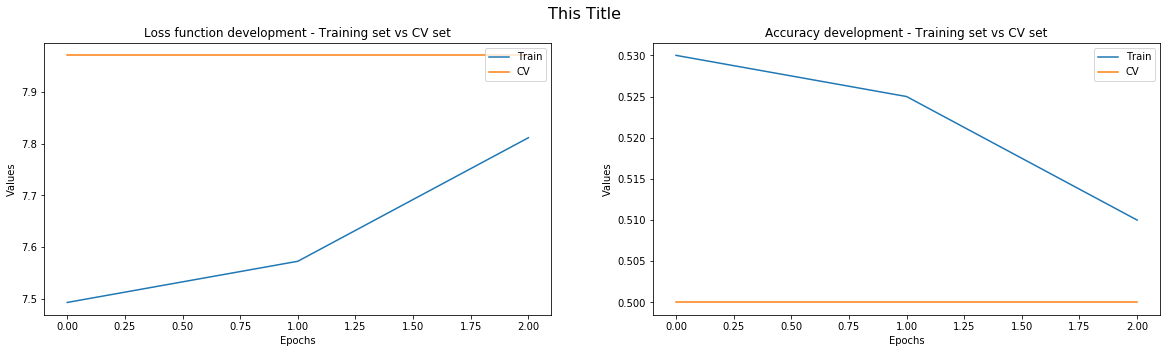

In [135]:
def my_plot_hist(history, model_title = "Default Title"):
    fig = plt.figure(figsize=(5,4))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=False)

    ax1.plot(history.epoch,  history.history['loss'], label="Train")
    ax1.plot(history.epoch,  history.history['val_loss'], label="CV")
    ax1.set_title("Loss function development - Training set vs CV set")
    ax1.legend(loc='upper right')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Values')

    ax2.plot(history.epoch,  history.history['acc'],label="Train")
    ax2.plot(history.epoch,  history.history['val_acc'],label="CV")
    ax2.set_title("Accuracy development - Training set vs CV set")
    ax2.legend(loc='upper right')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Values')

    plt.suptitle(model_title, fontsize=16)

    plt.show()

#history_dict = history.__dict__
my_plot_hist(history2, "This Title")